<a href="https://colab.research.google.com/github/kogilo/web-scrapinp-py-BeautifuSoup/blob/master/Player_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# at the top of the file, before other imports
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# create a csv file to save data in
f = open('playerSalariesData.csv', 'w', encoding='utf8', newline='')
# create a writer to write data with to the newly created csv-file
writer = csv.writer(f, delimiter=',')
# use the writer to write the first row, the column headers, to the file
writer.writerow(["name", "team", "pos", "salary", "year", "total_value", "avg_annual"])
# set page you want to visit
url = 'https://www.usatoday.com/sports/mlb/salaries/'
# request html of page using the request library
page = requests.get(url)
# create soup - parse HTML of webpage
soup = BeautifulSoup(page.content, 'html.parser')
# select table from soup
table = soup.find('table')
# for every row in table...
for row in table.find_all('tr'):
        # ...save the data in each cell to cells
        cells = row.find_all(['th', 'td'])
        # ...get the data from each of the 6 cells and save to variables
        name = cells[1].text.strip()
        team = cells[2].text.strip()
        pos = cells[3].text.strip()
        salary = cells[4].text.strip()
        year = cells[5].text.strip()
        total_value = cells[6].text.strip()
        avg_annual = cells[7].text.strip()
        # create a list called rowData with all data from this row in there
        rowData = [name, team, pos, salary, year, total_value, avg_annual ]

        # ...write the data to the CSV file
        writer.writerow(rowData)
        
# note that the indention ends here...
# the next assignment does not need to be done for every row in table;
# just closing the file once will do :)
f.close()

In [4]:
df = pd.read_csv('/content/playerSalariesData.csv')
df.head(2)

,name,team,pos,salary,year,total_value,avg_annual
0,Name,Team,POS,Salary,Years,Total Value,Avg Annual
1,Max Scherzer,WSH,SP,"$42,142,857",7 (2015-21),"$210,000,000","$30,000,000"


In [6]:
#drop the first row
df.drop(df.index[0], inplace=True)

In [7]:
df.dtypes

name           object
team           object
pos            object
salary         object
year           object
total_value    object
avg_annual     object
dtype: object

In [8]:
df.shape

(876, 7)

To see a descriptive statistics summary of our data, including the median, average value for every column, type `df.describe()

In [10]:
df.describe()

,name,team,pos,salary,year,total_value,avg_annual
count,876,876,876,876,876,876,876
unique,876,30,12,433,42,441,425
top,Drew Robinson,PIT,RP,"$555,000",1 (2019),"$555,000","$555,000"
freq,1,33,271,41,666,41,41


# Clean data

**Clean data to do list**
- make sure that numerical values are recognized as such


In [11]:
df.sample()

,name,team,pos,salary,year,total_value,avg_annual
619,Keon Broxton,NYM,CF,"$571,765",1 (2019),"$571,765","$571,765"


In [12]:

df['total_valueClean'] = df['total_value'].str.replace('$', '')


In [13]:
df.head()

,name,team,pos,salary,year,total_value,avg_annual,total_valueClean
2,Stephen Strasburg,WSH,SP,"$36,428,571",7 (2017-23),"$175,000,000","$25,000,000","175,000,000"
3,Mike Trout,LAA,CF,"$34,083,333",6 (2015-20),"$144,500,000","$24,083,333","144,500,000"
4,Zack Greinke,ARI,SP,"$32,421,884",6 (2016-21),"$206,500,000","$34,416,667","206,500,000"
5,David Price,BOS,SP,"$31,000,000",7 (2016-22),"$217,000,000","$31,000,000","217,000,000"
6,Clayton Kershaw,LAD,SP,"$31,000,000",3 (2019-21),"$93,000,000","$31,000,000","93,000,000"


In [14]:
df['total_valueClean'] = df['total_valueClean'].str.replace(',', '')


In [15]:
df.sample(5)

,name,team,pos,salary,year,total_value,avg_annual,total_valueClean
602,Nick Williams,PHI,RF,"$575,000",1 (2019),"$575,000","$575,000",575000
617,Jake Cave,MIN,OF,"$572,500",1 (2019),"$572,500","$572,500",572500
775,Nick Burdi,PIT,RP,"$559,000",1 (2019),"$559,000","$559,000",559000
275,Eddie Rosario,MIN,LF,"$4,190,000",1 (2019),"$4,190,000","$4,190,000",4190000
3,Mike Trout,LAA,CF,"$34,083,333",6 (2015-20),"$144,500,000","$24,083,333",144500000


Now, let's see if this did the trick. Use `df.dtypes` to see if the ValueClean column is now a float datatype...

In [16]:
df.dtypes

name                object
team                object
pos                 object
salary              object
year                object
total_value         object
avg_annual          object
total_valueClean    object
dtype: object

## Heatmap to visulaize the missing data


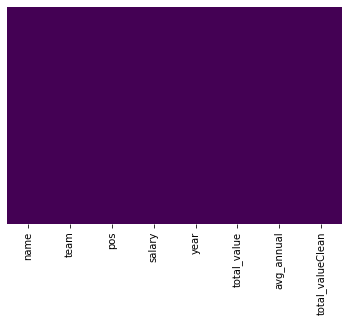

In [17]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');


Didn't work, huh? That's because we need to explicitly tell Python that the Clean columns contains float numbers. We can use a Pandas function to do this - like all Pandas functions this one too starts with `pd.`:

`df['ValueClean'] = pd.to_numeric(df['ValueClean'])`

In [18]:

df['total_valueClean'] = pd.to_numeric(df['total_valueClean'])


In [19]:
df.dtypes

name                object
team                object
pos                 object
salary              object
year                object
total_value         object
avg_annual          object
total_valueClean     int64
dtype: object

In [30]:
df = df.rename(columns={'total_valueClean': 'total_salary'})
df.sample()

,name,team,pos,salary,year,total_value,avg_annual,total_salary
603,Brandon Brennan,SEA,RP,"$575,000",1 (2019),"$575,000","$575,000",575000


In [31]:
df = df.dropna()
df.head()

,name,team,pos,salary,year,total_value,avg_annual,total_salary
2,Stephen Strasburg,WSH,SP,"$36,428,571",7 (2017-23),"$175,000,000","$25,000,000",175000000
3,Mike Trout,LAA,CF,"$34,083,333",6 (2015-20),"$144,500,000","$24,083,333",144500000
4,Zack Greinke,ARI,SP,"$32,421,884",6 (2016-21),"$206,500,000","$34,416,667",206500000
5,David Price,BOS,SP,"$31,000,000",7 (2016-22),"$217,000,000","$31,000,000",217000000
6,Clayton Kershaw,LAD,SP,"$31,000,000",3 (2019-21),"$93,000,000","$31,000,000",93000000


Now, if this looks better, let's get started and analyse some data.

# Analyse data

## Statistical summary

In the module Clean data, you already saw the power of `df.describe()`. This function gives a basic statistical summary of every column in the dataset. It will give you even more information when you tell the function that you want everything included, like this: `df.describe(include='all')`

In [32]:
df.describe(include='all')

,name,team,pos,salary,year,total_value,avg_annual,total_salary
count,876,876,876,876,876,876,876,8.760000e+02
unique,876,30,12,433,42,441,425,NaN
top,Drew Robinson,PIT,RP,"$555,000",1 (2019),"$555,000","$555,000",NaN
freq,1,33,271,41,666,41,41,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.547975e+07
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.871066e+07
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+05
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.675000e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.681250e+06


## Sum

 Use `df['Value'].sum()`.

In [33]:
df['total_salary'].sum()

13560257353

## Count the Teams

In [34]:
df['team'].value_counts()

PIT    33
LAA    33
NYY    32
OAK    32
SD     32
TOR    32
KC     31
STL    30
NYM    30
CHC    30
MIL    30
SEA    30
ARI    29
BOS    29
ATL    29
MIN    29
CLE    29
CWS    28
TB     28
DET    28
TEX    28
BAL    28
LAD    28
HOU    27
PHI    27
COL    27
CIN    27
MIA    27
WSH    27
SF     26
Name: team, dtype: int64

## Groupby

In [35]:
team = df.groupby('team')['total_salary'].sum()
team.head(10)

team
ARI    331547100
ATL    299700000
BAL    293008368
BOS    701555000
CHC    726261000
CIN    566142500
CLE    299716700
COL    386963500
CWS    195752000
DET    448673400
Name: total_salary, dtype: int64

# Plot

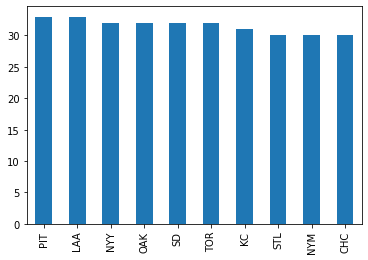

In [36]:
df['team'].value_counts().head(10).plot.bar();

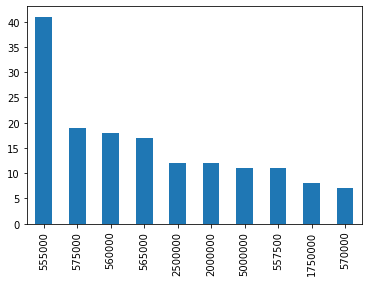

In [37]:
df['total_salary'].value_counts().head(10).plot.bar();

# Salary Distribution

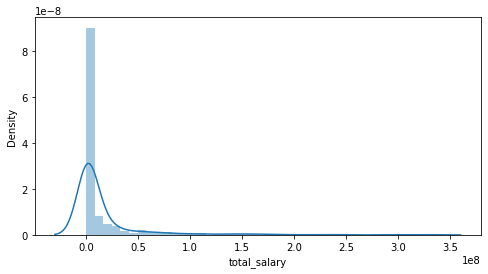

In [42]:
#Histogram and KDE
plt.figure(figsize=(8, 4))
sns.distplot(df['total_salary'], bins=40);

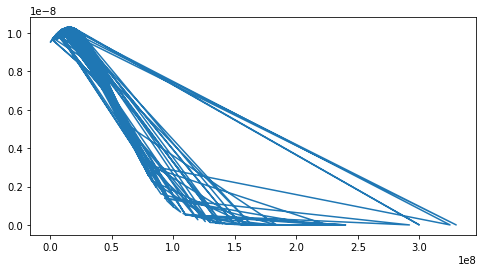

In [43]:
#Probability Density Function (PDF) Chart

import scipy.stats as st

x = df['total_salary']

plt.figure(figsize=(8, 4))
plt.plot(x, st.norm.pdf(x, x.mean(), x.std()))
plt.show()

# Normalizing the salary data


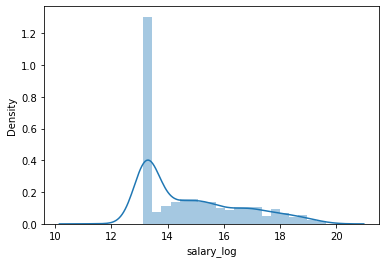

In [44]:
#Creating a column with the salary log to normalize the distribution

import numpy as np
df['salary_log'] = np.log1p(df['total_salary'])
sns.distplot(df['salary_log'], bins=25);

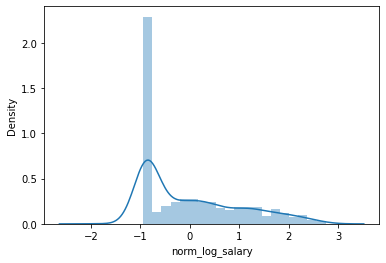

In [46]:
#Dividing by the mean and standard deviation to standardize the serie in a new column
df['norm_log_salary'] = ((df['salary_log'] - df['salary_log'].mean()) / df['salary_log'].std())
sns.distplot(df['norm_log_salary'], bins=25);

# Mean and Standard Deviation

In [47]:
print(f"""Mean: {df.norm_log_salary.mean():.4f}
Standard: {df.norm_log_salary.std():.4f}""")

Mean: -0.0000
Standard: 1.0000


# P-Value to 2 std

In [48]:
norm_mean = df.norm_log_salary.mean()
norm_std = df.norm_log_salary.std()

p_value = st.norm(norm_mean, norm_std).sf(2*norm_std) * 2 #to sides
p_value

0.04550026389635814

# Calculating z-score

In [49]:
z_score_inf = st.norm.interval(alpha=0.95, loc=norm_mean, scale=norm_std)[0]
z_score_sup = st.norm.interval(alpha=0.95, loc=norm_mean, scale=norm_std)[1]

print(f'{z_score_inf:.4f} <--------> {z_score_sup:.4f}')

-1.9600 <--------> 1.9600


With the Alpha limits of 0.95 we can run the inference and find out which players are earning above or below average with a 95% confidence level.